## Setup

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

#### Vamos trabalhar com o Dataset de Preços de Moradias em Boston

Colunas:

* CRIM: Taxa de criminalidade per capita por cidade
* ZN: Proporção de terrenos residenciais divididos por lotes com mais de 25.000 pés quadrados
* INDUS: Proporção de acres não-comerciais por cidade
* CHAS: variável fictícia Charles River (= 1 se o trecho limita o rio; 0 caso contrário)
* NOX: concentração de óxido nítrico (partes por 10 milhões)
* RM: Número médio de quartos por habitação
* AGE: Proporção de unidades ocupadas pelos proprietários construídas antes de 1940
* DIS: distâncias ponderadas a cinco centros de emprego em Boston
* RAD: Índice de acessibilidade às rodovias radiais
* TAX: taxa do imposto sobre a propriedade de valor total por US 10.000
* PTRATIO: Proporção de alunos por professor por cidade
* B: 1000 (Bk - 0,63) ², onde Bk é a proporção de [pessoas de descendência afro-americana] por cidade
* LSTAT: Porcentagem de status inferior da população
* MEDV: valor médio das casas ocupadas pelos proprietários em US 1000

In [2]:
dataset = load_boston()
x = dataset.data
y = dataset.target
columns = dataset.feature_names
#create the dataframe
boston_df = pd.DataFrame(dataset.data)
boston_df.columns = columns
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Identificando Outliers visualmente

#### Univariadas

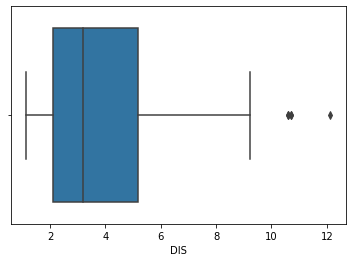

In [3]:
import seaborn as sns
sns.boxplot(x=boston_df['DIS'])

#### Multivariadas

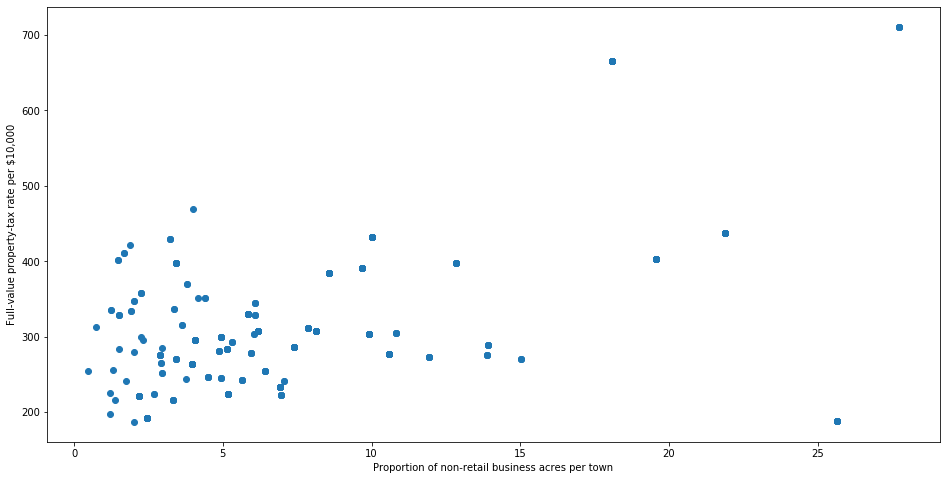

In [4]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()


### Identificando Outliers matematicamente

#### Z-Score

In [5]:
from scipy.stats import zscore
import numpy as np
boston_df_z = boston_df.apply(zscore, axis=0)
boston_df_z.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [6]:
threshold = 3
print(np.where(boston_df_z > threshold))

(array([ 55,  56,  57, 141, 142, 152, 154, 155, 160, 162, 163, 199, 200,
       201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219, 220,
       221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276, 277,
       282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356, 357,
       358, 363, 364, 364, 369, 370, 372, 373, 374, 380, 398, 404, 405,
       410, 412, 414, 414, 418, 427], dtype=int64), array([ 1,  1,  1, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,  1,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,  5,
        3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,  3,
        3,  3,  3,  3,  5,  3,  3,  3, 12, 12,  0,  0,  0,  0,  0, 12,  0,
       12,  0,  0], dtype=int64))


In [7]:
boston_df_z.iloc[55,1]

3.375038763517294

In [8]:
len(np.where(boston_df_z > threshold)[1])

71

In [9]:
boston_df_cleanz = boston_df[(boston_df_z < threshold).all(axis=1)]

In [10]:
boston_df_cleanz.shape

(439, 13)

#### IQR

In [11]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [12]:
((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).sum().sum()

303

In [13]:
boston_df_o2 = boston_df[~((boston_df < (Q1 - 1.5 * IQR)) |(boston_df > (Q3 + 1.5 * IQR))).any(axis=1)]
boston_df_o2.shape

(274, 13)

In [14]:
boston_df.shape

(506, 13)